<a href="https://colab.research.google.com/github/Sammyjoon/Test-repo/blob/master/Tensile_sammie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import math
import random
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Rohatgi/Datasets/Original Dataset AI-Gr Mechanical Properties without Average_Sammie.xlsx')

In [ ]:
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Material                           291 non-null    object 
 1   Density (g/cm^3)                   97 non-null     float64
 2   Aluminum content (wt%)             291 non-null    float64
 3   Graphene content (wt%)             291 non-null    float64
 4   Aluminum Vol                       291 non-null    float64
 5   Graphene Vol                       291 non-null    float64
 6   Graphene (Vol%)                    291 non-null    float64
 7   Aluminum (Vol%)                    291 non-null    float64
 8   Impurities (%)                     166 non-null    float64
 9   Theoretical UTS of AI (MPa)        291 non-null    float64
 10  Theortetical UTS Gr (MPa)          291 non-null    float64
 11  Theoretical UTS Composite (MPa)    291 non-null    float64

In [ ]:
df.dropna(subset=['Tensile strength (MPa)'], inplace=True)
print(df['Tensile strength (MPa)'].isna().sum().sum())

0


In [ ]:
df2 = df[['Density (g/cm^3)', 'Aluminum content (wt%)', 'Graphene content (wt%)', 'Graphene (Vol%)',
              'Aluminum (Vol%)', 'Impurities (%)', 'Theoretical UTS of AI (MPa)', 'Theortetical UTS Gr (MPa)',
             'Type of Graphene', 'Manufacturing Process', 'Heat treatment', 'Aluminum content (%)']]

# new_df.head(10)

## Data Preprocessing

In [ ]:
# Count NaN values in multiple columns of DataFrame
print(df2.isna().sum())

Density (g/cm^3)               101
Aluminum content (wt%)           0
Graphene content (wt%)           0
Graphene (Vol%)                  0
Aluminum (Vol%)                  0
Impurities (%)                  80
Theoretical UTS of AI (MPa)      0
Theortetical UTS Gr (MPa)        0
Type of Graphene                 0
Manufacturing Process            3
Heat treatment                   3
Aluminum content (%)             7
dtype: int64


In [ ]:
# Count NaN values of whole DataFrame
print(df2.isna().sum().sum())

194


In [ ]:
# Handeling missing values of x with replacing mean

mean_value = df2['Density (g/cm^3)'].astype(float).mean()
print(mean_value)

# Fill NaNs of this column with mean_value
df2['Density (g/cm^3)'].fillna(value=mean_value, inplace=True)


2.642154915254237


<ipython-input-496-2594ae7026b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Density (g/cm^3)'].fillna(value=mean_value, inplace=True)


In [ ]:
# Handeling missing values of x with replacing mean

mean_value = df2['Impurities (%)'].astype(float).mean()
print(mean_value)

# Fill NaNs of this column with mean_value
df2['Impurities (%)'].fillna(value=mean_value, inplace=True)


3.9222499999999996


<ipython-input-497-c4f160abce98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Impurities (%)'].fillna(value=mean_value, inplace=True)


In [ ]:

# Handeling missing values of input variables with replacing mean

mean_value = df2['Aluminum content (%)'].astype(float).mean()
print(mean_value)

# Fill NaNs of this column with mean_value
df2['Aluminum content (%)'].fillna(value=mean_value, inplace=True)


94.67002058471896


<ipython-input-498-e503bc15cab5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Aluminum content (%)'].fillna(value=mean_value, inplace=True)


In [ ]:
df2 = df2.replace(np.nan, None)

In [ ]:
# Count NaN values of whole DataFrame

y = df[['Tensile strength (MPa)']].astype(float)
print("Density (g/cm^3): ",df2['Density (g/cm^3)'].isna().sum().sum())
print("Missing of Aluminum content (wt%): ",df2['Aluminum content (wt%)'].isna().sum().sum())
print("Missing of Graphene content (wt%): ",df2['Graphene content (wt%)'].isna().sum().sum())
print("Missing of Density (g/cm^3): ",df2['Density (g/cm^3)'].isna().sum().sum())
print("Missing of Aluminum (Vol%): ",df2['Aluminum (Vol%)'].isna().sum().sum())
print("Missing of Impurities (%): ",df2['Impurities (%)'].isna().sum().sum())
print("Missing of Theoretical UTS of AI (MPa): ",df2['Theoretical UTS of AI (MPa)'].isna().sum().sum())
print("Missing of Theortetical UTS Gr (MPa): ",df2['Theortetical UTS Gr (MPa)'].isna().sum().sum())
print("Missing of Type of Graphene: ",df2['Type of Graphene'].isna().sum().sum())
print("Missing of Manufacturing Process: ",df2['Manufacturing Process'].isna().sum().sum())
print("Missing of Heat treatment: ",df2['Heat treatment'].isna().sum().sum())
print("Missing of Aluminum content (%): ",df2['Aluminum content (%)'].isna().sum().sum())
print("Missing of Tensile strength (MPa): ",df['Tensile strength (MPa)'].isna().sum().sum())

Density (g/cm^3):  0
Missing of Aluminum content (wt%):  0
Missing of Graphene content (wt%):  0
Missing of Density (g/cm^3):  0
Missing of Aluminum (Vol%):  0
Missing of Impurities (%):  0
Missing of Theoretical UTS of AI (MPa):  0
Missing of Theortetical UTS Gr (MPa):  0
Missing of Type of Graphene:  0
Missing of Manufacturing Process:  3
Missing of Heat treatment:  3
Missing of Aluminum content (%):  0
Missing of Tensile strength (MPa):  0


# Converting categorical columns to numerical:

In [ ]:

# creating a copy of the original data frame
df3 = df2.copy()

# calling the get_dummies method
# the first parameter mentions the
# the name of the data frame to store the
# new data frame in
# the second parameter is the list of
# columns which if not mentioned
# returns the dummies for all
# categorical columns
df3 = pd.get_dummies(df3,
					columns = ['Type of Graphene', 'Manufacturing Process', 'Heat treatment'])

display(df3)




,Density (g/cm^3),Aluminum content (wt%),Graphene content (wt%),Graphene (Vol%),Aluminum (Vol%),Impurities (%),Theoretical UTS of AI (MPa),Theortetical UTS Gr (MPa),Aluminum content (%),Type of Graphene_CNT,...,Heat treatment_Hot Compaction & Sintering,Heat treatment_Hot Extruded,Heat treatment_Hot Extrusion,Heat treatment_Hot-rolled,Heat treatment_Multi-Pass,Heat treatment_None,Heat treatment_Preheat,Heat treatment_Sintering,Heat treatment_T6,Heat treatment_Vacuum Hot Pressing
1,2.642155,99.75,0.0,0.000000,100.000000,0.25000,85.000000,0.000000,99.75,0,...,0,0,0,0,0,1,0,0,0,0
2,2.810000,91.40,0.0,0.000000,100.000000,9.60000,85.000000,0.000000,91.40,0,...,0,0,0,0,0,0,0,0,1,0
3,2.642155,90.00,0.0,0.000000,100.000000,10.00000,85.000000,0.000000,90.00,0,...,0,0,0,0,0,0,0,0,1,0
4,2.600000,85.50,0.0,0.000000,100.000000,14.50000,85.000000,0.000000,85.50,0,...,0,0,1,0,0,0,0,0,0,0
5,2.642155,100.00,0.0,0.000000,100.000000,0.00000,85.000000,0.000000,100.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2.642155,95.25,3.0,3.615559,96.384441,3.92225,81.926775,4700.226642,95.25,0,...,0,0,1,0,0,0,0,0,0,0
266,2.642155,95.25,3.0,3.615559,96.384441,3.92225,81.926775,4700.226642,95.25,0,...,0,0,1,0,0,0,0,0,0,0
269,2.642155,96.50,3.8,4.500000,95.520150,3.92225,81.192127,5850.000000,96.50,0,...,0,0,0,1,0,0,0,0,0,0
289,2.630000,94.00,7.5,8.678026,91.321974,3.92225,77.623678,11281.433740,94.00,0,...,0,1,0,0,0,0,0,0,0,0


## Data Analysis Using Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-503-abb52922b9c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Aluminum content (wt%)'])


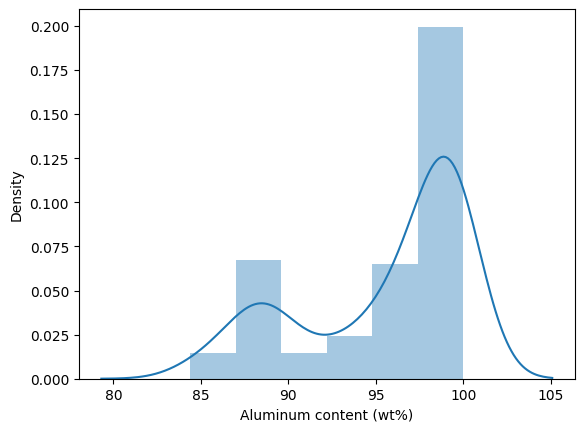

In [ ]:

sns.distplot(df3['Aluminum content (wt%)'])
plt.show()

<Axes: ylabel='Frequency'>

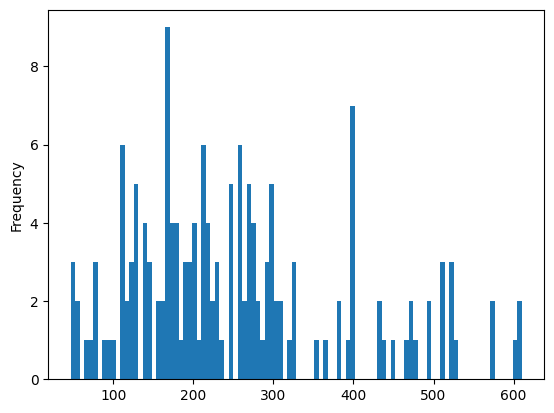

In [ ]:
# histogram plt of y
df['Tensile strength (MPa)'].plot(bins=100,kind='hist')

In [ ]:
len(df['Tensile strength (MPa)'])

160

## Machine Learning Algorithms

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Create a numpy array of data:
X = df3.to_numpy()
y = df['Tensile strength (MPa)'].astype(float)
y = y.to_numpy()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112, shuffle = True)



In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

## Linear Regression

In [ ]:
# define the regression models
reg_model = LinearRegression().fit(X_train, y_train)

# Calculating the predicted values
y_pred_lr = reg_model.predict(X_test)

In [ ]:
# y_test

In [ ]:
# y_pred

In [ ]:
train_pred_lr = reg_model.predict(X_train)
y_test_lr = sc_y.transform(y_test)

print('R2 (train): ', r2_score(y_train , train_pred_lr))
print('R2 (test): ', r2_score(y_test_lr , y_pred_lr))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

R2 (train):  0.8073044880353213
R2 (test):  -9.393111640607373e+24
Mean Absolute Error (MAE): 1222564847576.78
Mean Squared Error (MSE): 7.28218817765052e+24
Root Mean Squared Error (RMSE): 2698552978477.6357


## Ramdom Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

y_pred_rf = regressor.predict(X_test)


<ipython-input-512-c3ed7f380b82>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [ ]:
train_pred_rf = regressor.predict(X_train)
y_test_rf = sc_y.transform(y_test)

print('R2 (train): ',r2_score(y_train , train_pred_rf))
print('R2 (test): ',r2_score(y_test , y_pred_rf))

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

R2 (train):  0.9313788479796589
R2 (test):  -4.5348249329136365
Mean Absolute Error (MAE): 255.04352851935744
Mean Squared Error (MSE): 79227.5287631472
Root Mean Squared Error (RMSE): 281.47385094027334


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

random.seed(123)
def getData(N):
 x,y =[],[]
 for i in range(N):
  a = i/10+random.uniform(-1,1)
  yy =math.sin(a)+3+random.uniform(-1,1)
  x.append([a])
  y.append([yy])

 return np.array(x), np.array(y)



KNeighborsRegressor(n_neighbors=8)
0.5547626396529213
Mean Squared Error: 0.3342911375775352
Root Mean Squared Error: 0.578179156989886


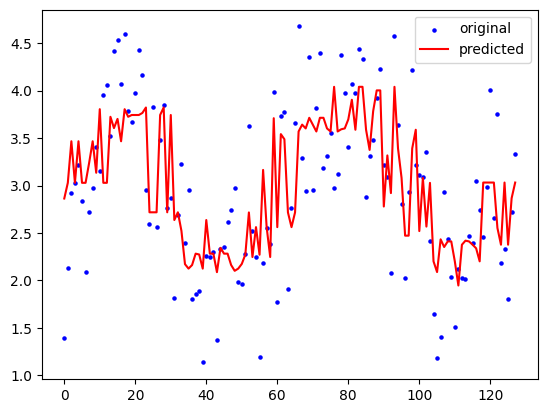

In [ ]:
x,y=getData(128)
model = KNeighborsRegressor(n_neighbors=8)
print(model)

model.fit(x,y)
pred_y = model.predict(x)

score=model.score(x,y)
print(score)

mse =mean_squared_error(y, pred_y)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

x_ax=range(128)
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, pred_y, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
print(knn_model)

knn_model.fit(X_train, y_train)

y_pred_knn = regressor.predict(X_train)

KNeighborsRegressor()


In [ ]:
score=knn_model.score(X_train, y_train)
print('R2 (train):' , score)

mse =mean_squared_error(y_train, y_pred_knn)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R2 (train): 0.5384862758909483
Mean Squared Error: 0.06862115202034111
Root Mean Squared Error: 0.2619563933564919


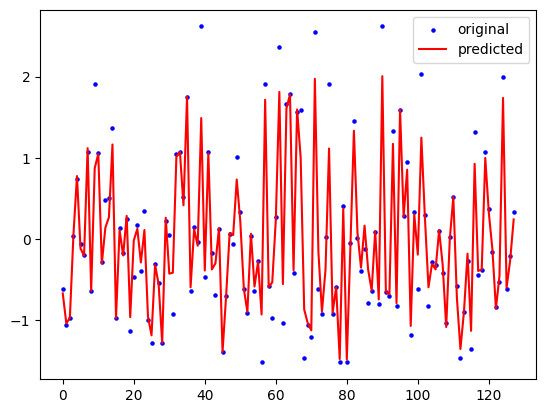

In [ ]:
x_ax=range(128)
plt.scatter(x_ax, y_train, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()